```python
from numpy import uint8, uint16
from pandas import concat, read_csv
from math import floor, log10

_1 = uint8(1)
_2 = {"2": _1, "D": _1, "S": uint8(2)}
_3 = uint8(0)
_4 = uint16(0)
_5 = lambda _6: _2.get(_6.replace(" ", ""), _3)
_7 = lambda _8: uint16(_8.replace(" ", "").replace(",", "")) if _8 else _4
_9 = "DE", "DR", "V"
_10 = {"T": _5, "R": _5, "E": _7, "A": _7, "DE": _7, "DA": _7, "H": _7, "M": _7}
_11 = concat((read_csv(f"R/{_12}.csv", index_col=0, converters=_10) for _12 in _9), keys=_9, names=("RE",))
_13 = _11.iloc[:, :2]
for _14 in _11.columns.to_list()[2:]:
    for _15 in range(floor(log10(_11[_14].max())), -1, -1):
        _13[f'{_14}{_15}'] = (_11[_14].to_numpy() // 10 ** _15 % 10).astype(uint8)

In [1]:
from numpy import uint8, uint16
from pandas import concat, read_csv

UINT8_ONE = uint8(1)
CATEGORY_MAP = {"2": UINT8_ONE, "D": UINT8_ONE, "S": uint8(2)}
UINT8_ZERO = uint8(0)
UINT16_ZERO = uint16(0)
convert_category = lambda value: CATEGORY_MAP.get(value.replace(" ", ""), UINT8_ZERO)
convert_numeric = lambda value: uint16(value.replace(" ", "").replace(",", "")) if value else UINT16_ZERO
CSV_KEYS = "DE", "DR", "V"
CONVERTERS = {
    "T": convert_category,
    "R": convert_category,
    "E": convert_numeric,
    "A": convert_numeric,
    "DE": convert_numeric,
    "DA": convert_numeric,
    "H": convert_numeric,
    "M": convert_numeric
}
df = concat(
    (read_csv(f"R/{key}.csv", index_col=0, converters=CONVERTERS) for key in CSV_KEYS), keys=CSV_KEYS, names=("RE",)
)
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    0  0   0  0   8  2947  1425  4611
   1    0  1   1  0   3  1818     0   650
   1    0  1   2  0   7  4735   487   308
   1    0  2   1  0   3  2078  2748     0
   1    0  2   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  1  0   7  2   4  6453     0  9665
   467  1  1  10  0   5  6272    62  1417
   467  1  1   6  1   7  5267    78    76
   467  1  2   5  1   6  4602  8211   716
   467  1  2   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       9110 non-null   uint8 
 1   R       9110 non-null   uint8 
 2   E       9110 non-null   uint16
 3   A       9110 non-null   uint16
 4   DE      9110 non-null   uint16
 5   DA      9110 non-null   uint16
 6   H       9110 non-null   uint16
 7   M       9110 non-null   uint16
dtypes: uint16(6), uint8(2)
memory usage: 171.3+ KB


In [12]:
from math import floor, log10

result = df.iloc[:, :2]
for col in df.columns.to_list()[2:]:
    for digit_index in range(floor(log10(df[col].max())), -1, -1):
        result[f"{col}{digit_index}"] = (df[col].to_numpy() // 10 ** digit_index % 10).astype(uint8)
result

T  R  E1  E0  A1  A0  DE1  DE0  DA4  DA3  ...  H4  H3  H2  H1  H0  M4  \
RE I                                              ...                           
DE 1    0  0   0   0   0   0    0    8    0    2  ...   0   1   4   2   5   0   
   1    0  1   0   1   0   0    0    3    0    1  ...   0   0   0   0   0   0   
   1    0  1   0   2   0   0    0    7    0    4  ...   0   0   4   8   7   0   
   1    0  2   0   1   0   0    0    3    0    2  ...   0   2   7   4   8   0   
   1    0  2   0   1   0   1    0    3    0    0  ...   0   5   8   4   8   0   
...    .. ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..   
V  467  1  0   0   7   0   2    0    4    0    6  ...   0   0   0   0   0   0   
   467  1  1   1   0   0   0    0    5    0    6  ...   0   0   0   6   2   0   
   467  1  1   0   6   0   1    0    7    0    5  ...   0   0   0   7   8   0   
   467  1  2   0   5   0   1    0    6    0    4  ...   0   8   2   1   1   0   
   467  1  2   0   2   0   5    0    7    0    1  ...   0   7   3   9   6   0   

        M3  M2  M1  M0  
RE I                    
DE 1     4   6   1   1  
   1     0   6   5   0  
   1     0   3   0   8  
   1     0   0   0   0  
   1     0   1   8   9  
...     ..  ..  ..  ..  
V  467   9   6   6   5  
   467   1   4   1   7  
   467   0   0   7   6  
   467   0   7   1   6  
   467   0   3   2   9  

[9110 rows x 23 columns]

In [13]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T       9110 non-null   uint8
 1   R       9110 non-null   uint8
 2   E1      9110 non-null   uint8
 3   E0      9110 non-null   uint8
 4   A1      9110 non-null   uint8
 5   A0      9110 non-null   uint8
 6   DE1     9110 non-null   uint8
 7   DE0     9110 non-null   uint8
 8   DA4     9110 non-null   uint8
 9   DA3     9110 non-null   uint8
 10  DA2     9110 non-null   uint8
 11  DA1     9110 non-null   uint8
 12  DA0     9110 non-null   uint8
 13  H4      9110 non-null   uint8
 14  H3      9110 non-null   uint8
 15  H2      9110 non-null   uint8
 16  H1      9110 non-null   uint8
 17  H0      9110 non-null   uint8
 18  M4      9110 non-null   uint8
 19  M3      9110 non-null   uint8
 20  M2      9110 non-null   uint8
 21  M1      9110 non-null   uint8
 22  M0      9110 n

In [26]:
result.iloc[:, 2:].stack().value_counts()

0    81301
1    23627
2    14285
3    11818
4    10868
5    10622
6    10428
7     9948
8     9502
9     8911
Name: count, dtype: int64

In [11]:
df.to_numpy().reshape(-1, 10, 8)

array([[[    0,     0,     0, ...,  2947,  1425,  4611],
        [    0,     1,     1, ...,  1818,     0,   650],
        [    0,     1,     2, ...,  4735,   487,   308],
        ...,
        [    1,     2,     8, ...,  2790,  4794,     0],
        [    1,     2,    10, ...,  2226,  5556,   208],
        [    1,     0,    17, ...,  4381,     0,  7181]],

       [[    0,     0,    23, ..., 10899,   163,  5789],
        [    0,     1,    22, ...,  7938,     0,   340],
        [    0,     1,    21, ..., 11522,  1304,   231],
        ...,
        [    1,     1,    32, ..., 10120,   248,  1281],
        [    1,     1,    24, ...,  8344,     0,     0],
        [    1,     0,    26, ...,  9395,     0,  6943]],

       [[    0,     0,    28, ..., 10186,  1773,  2747],
        [    0,     1,    22, ...,  8198,     0,  1646],
        [    0,     1,    38, ..., 11016,     0,  2151],
        ...,
        [    1,     1,    12, ...,  8030,  2979,     0],
        [    1,     1,    20, ...,  7761,    

In [6]:
reshaped = df.to_numpy().reshape(-1, 10, 7)
reshaped.shape

ValueError: cannot reshape array of size 72880 into shape (10,7)

2025-12-17 13:33:18.087962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765978398.320430      29 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765978398.384742      29 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765978398.903255      29 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765978398.903289      29 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765978398.903292      29 computation_placer.cc:177] computation placer alr

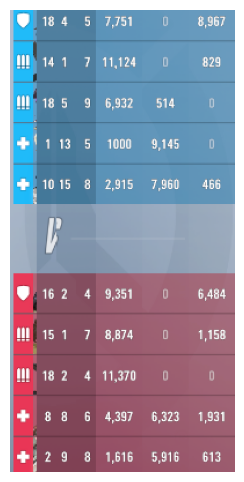

[[0 0 1 8 0 4 0 5 0 7 7 5 1 0 0 0 0 0 0 8 9 6 7]
 [0 1 1 4 0 1 0 7 1 1 1 2 4 0 0 0 0 0 0 0 8 2 9]
 [0 1 1 8 0 5 0 9 0 6 9 3 2 0 0 5 1 4 0 0 0 0 0]
 [0 2 0 1 1 3 0 5 0 1 0 0 0 0 9 1 4 5 0 0 0 0 0]
 [0 2 1 0 1 5 0 8 0 2 9 1 5 0 7 9 6 0 0 0 4 6 6]
 [1 0 1 6 0 2 0 4 0 9 3 5 1 0 0 0 0 0 0 6 4 8 4]
 [1 1 1 5 0 1 0 7 0 8 8 7 4 0 0 0 0 0 0 1 1 5 8]
 [1 1 1 8 0 2 0 4 1 1 3 7 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 8 0 8 0 6 0 4 3 9 7 0 6 3 2 3 0 1 9 3 1]
 [1 2 0 2 0 9 0 8 0 1 6 1 6 0 5 9 1 6 0 0 6 1 3]]


2025-12-17 13:33:26.876352: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
from pathlib import Path
from tensorflow.random import shuffle
import tensorflow as tf
from tensorflow import gather
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show

image_paths = sorted(map(str, Path().rglob("*.png")))

data_count = len(image_paths)
indices = shuffle(tf.range(data_count))
X_shuffled = gather(image_paths, indices)
y_shuffled = gather(reshaped, indices)

train_size = int(data_count * .9)
train_X = X_shuffled[:train_size]
val_X = X_shuffled[train_size:]

train_y = y_shuffled[:train_size]
val_y = y_shuffled[train_size:]


def preprocess_image(path, label):
    image = decode_png(read_file(path), channels=3)[230:930, 530:1370]
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


def make_dataset(X, y, shuffle=False, batch_size=32):
    ds = Dataset.from_tensor_slices((X, y))
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


train_ds = make_dataset(train_X, train_y, shuffle=True)
val_ds = make_dataset(val_X, val_y, shuffle=False)
for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()
    print(y_batch[0].numpy())

In [7]:
input_shape = x_batch.shape[1:]
output_shape = reshaped.shape[1:]
input_shape, output_shape

(TensorShape([400, 194, 3]), (10, 23))

In [11]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Conv2D, BatchNormalization, Resizing, Reshape

ROWS = output_shape[0]  # 10
COLS = output_shape[1]  # 23
DIGIT_CLASSES = 10

clear_session()
inputs = Input(input_shape)  # 400, 194, 3
backbone = EfficientNetB0(False, input_tensor=inputs)
x = backbone.output
x = Conv2D(256, 3, padding="same", activation="relu")(x)
x = BatchNormalization()(x)


x = Conv2D(256, 3, (2, 2), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, 3, (2, 2), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
print(x.shape)
# x = Resizing(ROWS, COLS)(x)  # Feature Map → (10, 7) Grid

x = Conv2D(DIGIT_CLASSES, 1, padding="same")(x)
outputs = Reshape((ROWS, COLS, DIGIT_CLASSES))(x)  # (B, 10, 23, 10)
model = Model(inputs, outputs)
model.summary()

(None, 4, 2, 256)


ValueError: The total size of the tensor must be unchanged. Received: input_shape=(4, 2, 10), target_shape=(10, 23, 10)

CTC 기반 Sequence 모델, 트랜스포머? 위치 임베딩

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

model.compile(Adam(1e-4), SparseCategoricalCrossentropy(True), metrics=[SparseCategoricalAccuracy()])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_ds,
    epochs=256,
    callbacks=EarlyStopping(patience=16, verbose=1, restore_best_weights=True),
    validation_data=val_ds
)

Epoch 1/256


2025-12-16 10:23:50.694739: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 2.3609 - sparse_categorical_accuracy: 0.2595

2025-12-16 10:24:15.805786: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - loss: 2.3531 - sparse_categorical_accuracy: 0.2627

2025-12-16 10:24:37.876230: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-12-16 10:24:40.667399: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


26/26 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 2.3459 - sparse_categorical_accuracy: 0.2656 - val_loss: 2.3951 - val_sparse_categorical_accuracy: 0.3074
Epoch 2/256
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 1.9080 - sparse_categorical_accuracy: 0.4276 - val_loss: 2.1271 - val_sparse_categorical_accuracy: 0.3579
Epoch 3/256
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 1.8191 - sparse_categorical_accuracy: 0.4414 - val_loss: 1.9950 - val_sparse_categorical_accuracy: 0.3999
Epoch 4/256
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 1.7580 - sparse_categorical_accuracy: 0.4471 - val_loss: 1.9890 - val_sparse_categorical_accuracy: 0.3981
Epoch 5/256
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 1.7067 - sparse_categorical_accuracy: 0.4566 - val_loss: 2.1343 - val_sparse_categorical_accuracy: 0.4164
Epoch 6/256
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 1.6711 - sparse_categorical_accuracy: 0.4628 - val_loss: 2.3034 - val_sparse_categorical_accuracy: 0.4164
Epoch 7/256


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


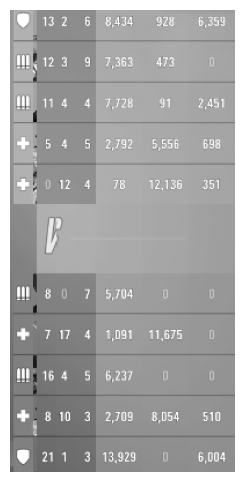

In [38]:
from numpy import array

for x_batch, y_batch in val_ds.take(1):
    x_sample = x_batch[0:1]
    y_sample = tuple(y[0] for y in y_batch)
    y_pred = model.predict(x_sample)
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()

In [40]:
print(*[tensor[0].numpy() for tensor in y_batch])
print()
print(*[int(y.argmax()) for y in y_pred])

0 1 1 3 0 2 0 6 0 8 4 3 4 0 0 9 2 8 0 6 3 5 9 0 2 1 2 0 3 0 9 0 7 3 6 3 0 0 4 7 3 0 0 0 0 0 0 2 1 1 0 4 0 4 0 7 7 2 8 0 0 0 9 1 0 2 4 5 1 0 3 0 5 0 4 0 5 0 2 7 9 2 0 5 5 5 6 0 0 6 9 8 0 3 0 0 1 2 0 4 0 0 0 7 8 1 2 1 3 6 0 0 3 5 1 1 2 0 8 0 0 0 7 0 5 7 0 4 0 0 0 0 0 0 0 0 0 0 1 3 0 7 1 7 0 4 0 1 0 9 1 1 1 6 7 5 0 0 0 0 0 1 2 1 6 0 4 0 5 0 6 2 3 7 0 0 0 0 0 0 0 0 0 0 1 3 0 8 1 0 0 3 0 2 7 0 9 0 8 0 5 4 0 0 5 1 0 1 1 2 1 0 1 0 3 1 3 9 2 9 0 0 0 0 0 0 6 0 0 4

0 1 1 3 0 3 0 0 0 6 1 1 3 0 0 0 0 0 0 4 6 8 8 0 2 0 4 0 1 0 1 0 4 5 7 6 0 0 0 0 0 0 0 0 0 0 0 2 0 8 0 0 0 8 0 4 6 6 7 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 1 0 0 3 6 0 0 0 0 7 0 0 0 0 0 0 0 3 0 0 0 0 0 4 0 1 0 4 2 0 6 7 6 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 4 2 5 6 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0
